<a href="https://colab.research.google.com/github/Tahan402/Tahan402/blob/Capstone/Lecture_49_Kernel_Density_Estimate_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

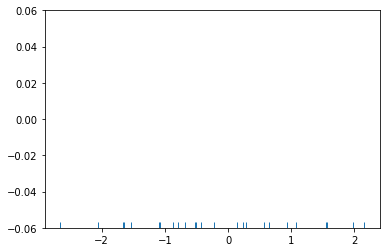

In [3]:
sns.rugplot(dataset)


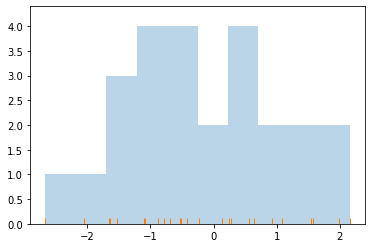

In [4]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0.0, 1.0)

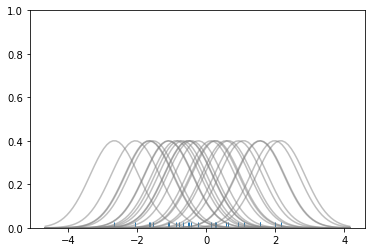

In [6]:
sns.rugplot(dataset)

x_min = dataset.min()-2
x_max = dataset.max()+2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) **0.2

kernel_list = []

for data_point in dataset:
  #create a kernel for each point and append it to the kernel_list

  kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
  kernel_list.append(kernel)

  # Scale for plotting

  kernel = kernel / kernel.max()
  kernel = kernel*0.4

  plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)
  
plt.ylim(0,1)

Text(0.5, 0.98, 'sum of the basics functions')

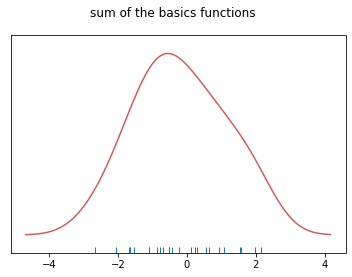

In [7]:
sum_of_kde = np.sum(kernel_list,axis =0)
fig = plt.plot(x_axis,sum_of_kde,color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('sum of the basics functions')

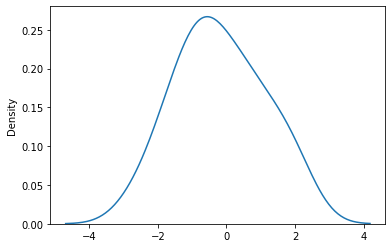

In [8]:
#just one line code
sns.kdeplot(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.75 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor

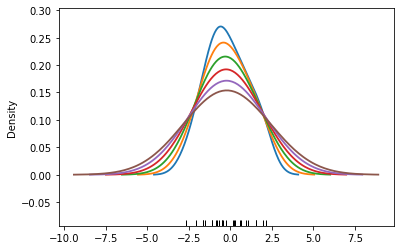

In [9]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
  sns.kdeplot(dataset,bw=bw,lw=1.8,label = bw)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions

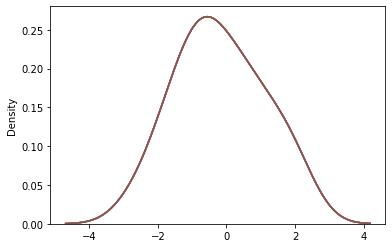

In [10]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
  sns.kdeplot(dataset,kernel = kern,label =kern )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions

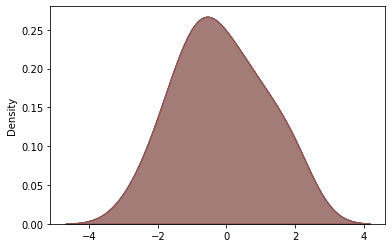

In [11]:
#shading 
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
  sns.kdeplot(dataset,kernel = kern,label =kern,shade = True )

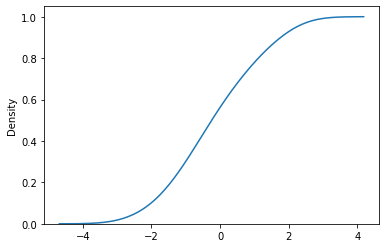

In [13]:
sns.kdeplot(dataset,cumulative = True)

In [16]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean , cov,1000)

dframe = pd.DataFrame(dataset2,columns= ['X','Y'])

sns.kdeplot(dframe)

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


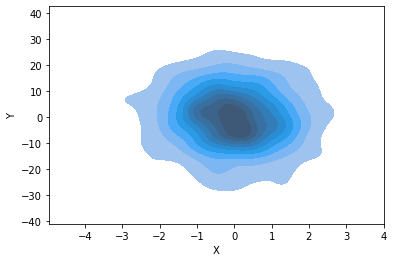

In [17]:
sns.kdeplot(dframe.X,dframe.Y,shade = True)

In [18]:
sns.kdeplot(dframe, bw = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ValueError: ignored

In [19]:
sns.kdeplot(dframe,bw= 'silverman')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using silverman for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


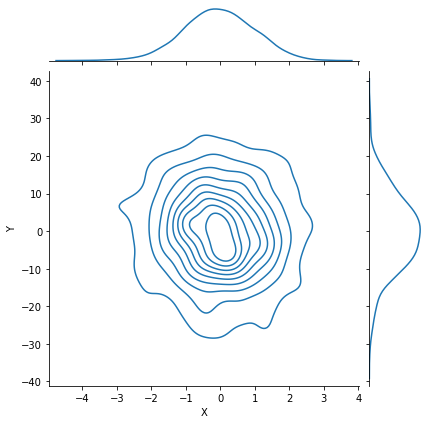

In [21]:
sns.jointplot('X',"Y",dframe,kind='kde')